In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [4]:
Measurement.__table__

Table('measurement', MetaData(bind=None), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None)

## D1: Determine the Summary Statistics for June

In [43]:
## D1: Determine the Summary Statistics for June

In [6]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june = session.query(Measurement.tobs).filter(extract('month',Measurement.date)=='6').all()

In [7]:
#  3. Convert the June temperatures to a list.
june_list = list(np.ravel(june))

In [8]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_list)

In [22]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,0
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


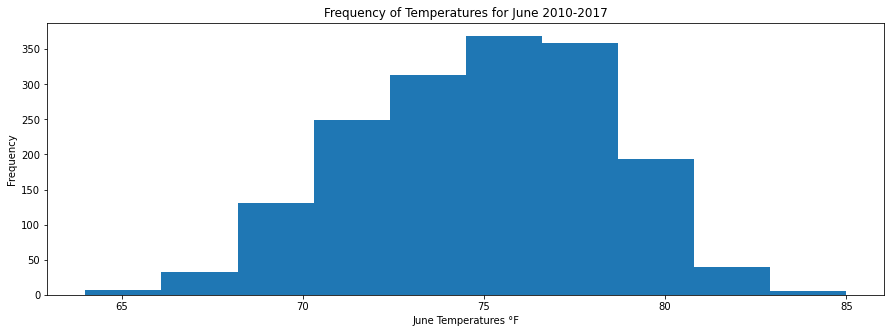

In [41]:
fig, ax = plt.subplots(figsize=(15,5))
ax.hist(june_df[0])
ax.set_xlabel('June Temperatures °F')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Temperatures for June 2010-2017')
plt.show()

## D2: Determine the Summary Statistics for December

In [10]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december = session.query(Measurement.tobs).filter(extract('month',Measurement.date)=='12').all()

In [11]:
# 7. Convert the December temperatures to a list.
december_list = list(np.ravel(december))

In [12]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_df = pd.DataFrame(december_list)

In [13]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_df.describe()

,0
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


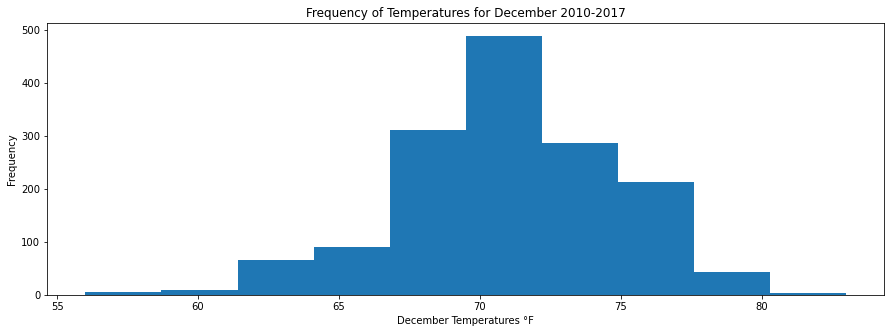

In [44]:
fig, ax = plt.subplots(figsize=(15,5))
ax.hist(december_df[0])
ax.set_xlabel('December Temperatures °F')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Temperatures for December 2010-2017')
plt.show()

In [15]:
mean = [np.ravel(session.query(Measurement.tobs).filter(extract('month',Measurement.date)==(i+1)).all()).mean() for i in range(12)]
std =  [np.ravel(session.query(Measurement.tobs).filter(extract('month',Measurement.date)==(i+1)).all()).std() for i in range(12)]
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [16]:
mean

[68.72611464968153,
 69.44223602484472,
 70.05906674542233,
 72.35726795096322,
 73.68090017311022,
 74.94411764705882,
 76.08240794856809,
 76.41245376078915,
 76.16486486486487,
 75.3913881748072,
 73.25268817204301,
 71.04152933421226]

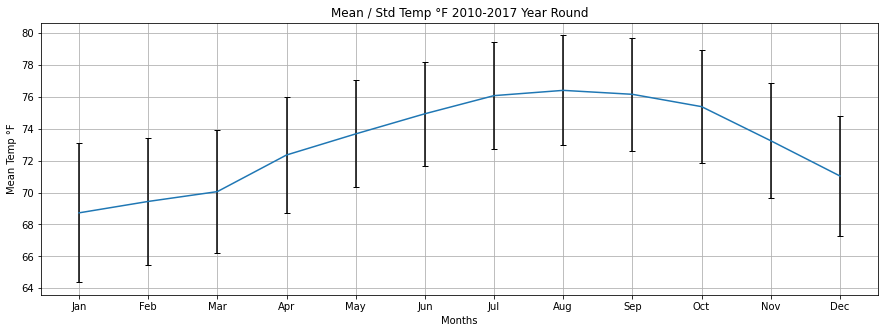

In [17]:
fig, ax = plt.subplots(figsize=(15,5))
ax.errorbar(months, mean, yerr=std, capsize=3, ecolor='black')
ax.grid()
ax.set_xlabel('Months')
ax.set_ylabel('Mean Temp °F')
ax.set_title('Mean / Std Temp °F 2010-2017 Year Round')
plt.show()

In [18]:
mean = [np.ravel(session.query(Measurement.tobs).filter(extract('month',Measurement.date)==(i+1)).filter(Measurement.station == 'USC00519281').all()).mean() for i in range(12)]
std =  [np.ravel(session.query(Measurement.tobs).filter(extract('month',Measurement.date)==(i+1)).filter(Measurement.station == 'USC00519281').all()).std() for i in range(12)]

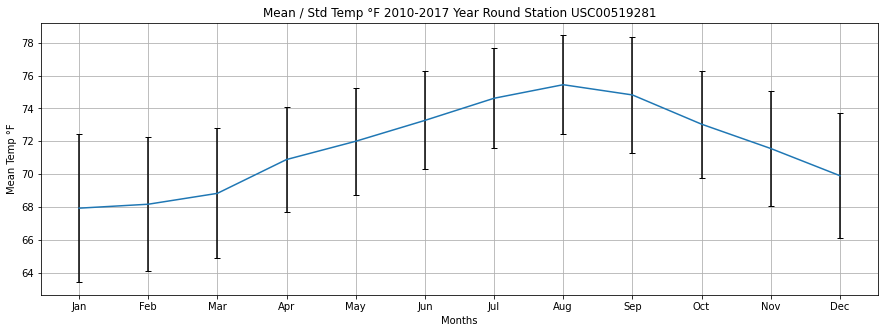

In [19]:
fig, ax = plt.subplots(figsize=(15,5))
ax.errorbar(months, mean, yerr=std, capsize=3, ecolor='black')
ax.grid()
ax.set_xlabel('Months')
ax.set_ylabel('Mean Temp °F')
ax.set_title('Mean / Std Temp °F 2010-2017 Year Round Station USC00519281')
plt.show()

In [65]:
mean = np.ravel([pd.DataFrame(np.ravel(session.query(func.sum(Measurement.prcp)).filter(extract('month',Measurement.date)==(i+1)).all())).replace('None',0).mean() for i in range(12)])
std =  np.ravel([pd.DataFrame(np.ravel(session.query(Measurement.prcp).filter(extract('month',Measurement.date)==(i+1)).all())).replace('None',0).std() for i in range(12)])
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [64]:
std

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

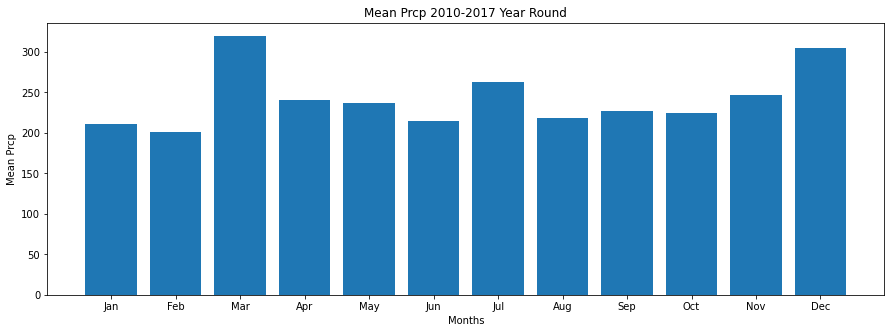

In [68]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(months, mean)
ax.set_xlabel('Months')
ax.set_ylabel('Mean Prcp')
ax.set_title('Mean Prcp 2010-2017 Year Round')
plt.show()